# Exploratory Data Analysis

Here we will look at recent sales data for the 5 market areas and try to get a feel for what we have. 

In [71]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline


In [72]:
X= pd.read_csv('data/clean_data.csv')

## Part 1. Explore the columns
So far we have kept all the fields. Let's see what we have. 

In [73]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area'],
      dtype='object')

Now we can explore each column one by one, come up with the better representation and then move on to relationships between variables. <br>

#### 'Location' variable.

In [74]:
X['Location'].unique()

array(['UNINCORPORATED', 'BOULDER', 'SUPERIOR', 'LOUISVILLE', 'ERIE',
       'LAFAYETTE'], dtype=object)

The only new information we're learning from 'Location' that is not already in a 'Market Area' is whether the location is unincorporated or not. So we can preserve the additional information with a binary variable. We will call new binary variable 'Unincorporated', where if  Unincorporated = 1, otherwise 0. 

In [75]:
X['Unincorporated']= 0
X.loc[X['Location']=='UNINCORPORATED', 'Unincorporated']=1
X['Unincorporated'].sum()

657

#### 'Design' variable

In [76]:
X['Design'].unique()

array(['Ranch', 'Split level', 'Bi Level', 'Multi Sty', 'Paired',
       '1 Sty Townh', 'Modular', nan], dtype=object)

In [77]:
X['Design_orig']= X['Design']

So for Design there is no obvious natural progression, so we prefer to one hot encode the variables and perhaps drop one category. 

In [78]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_orig'],
      dtype='object')

In [79]:
# Convert the Country column to a one hot encoded Data Frame
X = pd.get_dummies(X, columns=['Design_orig'], prefix='Design')

In [80]:
sum(X['Design']=='Ranch')

2979

In [81]:

# declaring data
data = [sum(X['Design']=='Ranch'), sum(X['Design']=='Split level'),sum(X['Design']=='Bi Level'),sum(X['Design']=='Multi Sty'),
       sum(X['Design']=='Paired'),sum(X['Design']=='1 Sty Townh'),sum(X['Design']=='Modular')]
keys = ['Ranch', 'Split level', 'Bi Level', 'Multi Sty', 'Paired',
       '1 Sty Townh', 'Modular']
  
fig = px.pie(X, values=data, names=keys, title='Housing types')
fig.show()

In [82]:
fig = px.histogram(X, x="Design")
fig.show()

#### 'Quality' variable
So for quality there is a natural progression from Fair to Average to Good to Excellent. It seems that the assumption of equal distance between the quality levels is correct. So we recode it as a single variable

In [83]:
X['Quality'].unique()

array(['Avg ++', 'Avg', 'Avg +', 'Good ++', 'Good', 'V Good', 'Good +',
       'V Good +', 'V Good++', 'Excel', 'Excel+', 'Fair', 'Excel++', nan],
      dtype=object)

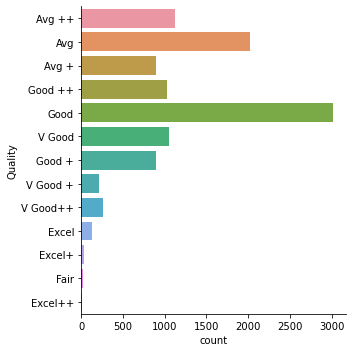

In [84]:
sns.catplot(y='Quality', data=X, kind='count')
plt.show()

In [85]:
# Create the Quality_cat column filled with zeros
X['Quality_cat'] = 0

X.loc[X['Quality']=='Avg', 'Quality_cat'] = 1
X.loc[X['Quality']=='Avg +', 'Quality_cat'] = 2
X.loc[X['Quality']=='Avg ++', 'Quality_cat'] = 3
X.loc[X['Quality']=='Good', 'Quality_cat'] = 4
X.loc[X['Quality']=='Good +', 'Quality_cat'] = 5
X.loc[X['Quality']=='Good ++', 'Quality_cat'] = 6
X.loc[X['Quality']=='V Good', 'Quality_cat'] = 7
X.loc[X['Quality']=='V Good +', 'Quality_cat'] = 8
X.loc[X['Quality']=='V Good++', 'Quality_cat'] = 9
X.loc[X['Quality']=='Excel', 'Quality_cat'] = 10
X.loc[X['Quality']=='Excel+', 'Quality_cat'] = 11
X.loc[X['Quality']=='Excel++', 'Quality_cat'] = 12

In [86]:
X.columns


Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat'],
      dtype='object')

In [87]:
fig = px.histogram(X, x="Quality_cat", title ='Property quality rating')
fig.show()

#### 'Garage Type' variable

In [88]:
X['Garage Type'].unique()

array(['Attached', 'Carport', 'Detached', 'None', 'Multiple', 'Basement',
       'Workshop'], dtype=object)

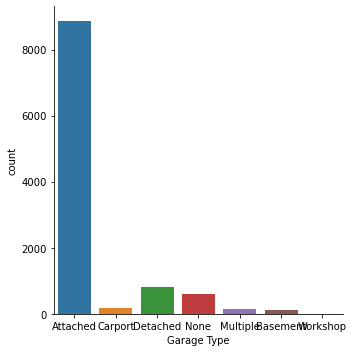

In [89]:
sns.catplot(x='Garage Type', data=X, kind='count')
plt.show()

For garage we will binarize to two categories 'attached' and 'other' since there are not many observations in other categories except attached. We create a new variable 'Garage Attached'

In [90]:
X['Garage Attached'] = 0
X.loc[X['Garage Type']=='Attached', 'Garage Attached'] = 1
X['Garage Attached'].sum()

8863

Encode market area as a categorical variable ranging from 1-5. I do not expect much effect from the market area, and perhaps a better idea would be to one hot encode them instead. 

In [91]:
X['Market Area Num']=X['Market Area']

In [92]:
# Convert the Country column to a one hot encoded Data Frame
X = pd.get_dummies(X, columns=['Market Area Num'], prefix='Market Area')

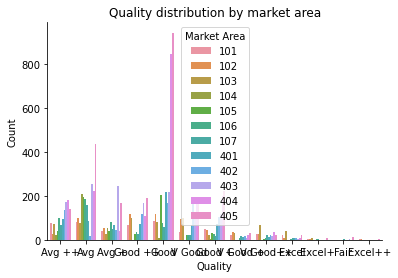

In [94]:
# Create a count plot of school with location subgroups
sns.countplot(x='Quality', data=X, hue='Market Area')
plt.title('Quality distribution by market area')
plt.xlabel('Quality')
plt.ylabel('Count')
sns.despine()
plt.show()

#### 'Above Grd SF' variable. 
We are interested in the distribution of square footage of single family homes.

In [95]:
X['Above Grd SF'].describe()

count    10707.000000
mean      2061.391706
std        838.098645
min        405.000000
25%       1401.500000
50%       1948.000000
75%       2582.000000
max       7659.000000
Name: Above Grd SF, dtype: float64

Text(0.5, 1.0, 'Basement and house area distribution')

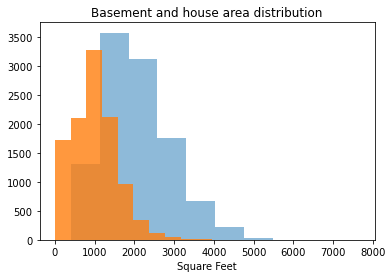

In [96]:
fig, ax = plt.subplots()
ax.hist(X['Above Grd SF'], alpha=0.5)
ax.hist(X['Basemt Tot SF'], alpha=0.8)
ax.set_xlabel('Square Feet')
ax.set_title ('Basement and house area distribution')


In [97]:
fig = px.box(X, y=["Above Grd SF"])
fig.show()

In [98]:
fig = px.box(X, y=["Basemt Tot SF"])
fig.show()

So let's explore the Time adjusted sale price for outliers.

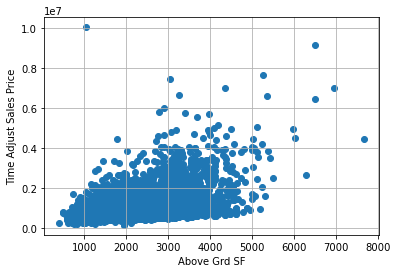

In [99]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(X['Above Grd SF'], X['Time Adjust Sales Price'])

# x-axis label
ax.set_xlabel('Above Grd SF')

# y-axis label
ax.set_ylabel('Time Adjust Sales Price')
plt.grid()
plt.show()


We clearly have at least two outliers that will make our work much harder. Let's identify them and drop them. 

In [100]:
print(np.where(X['Time Adjust Sales Price']>3000000))

(array([ 4845,  4846,  7123,  7130,  7156,  7158,  7197,  7217,  7219,
        7220,  7222,  7233,  7235,  7237,  7240,  7241,  7248,  7293,
        7294,  7295,  7300,  7302,  7327,  7330,  7372,  7373,  7374,
        7376,  7399,  7408,  7409,  7410,  7411,  7413,  7431,  7432,
        7433,  7434,  7438,  7441,  7442,  7445,  7450,  7451,  7456,
        7477,  7479,  7480,  7481,  7482,  7484,  7488,  7500,  7536,
        7537,  7538,  7543,  7554,  7556,  7563,  7597,  7626,  7633,
        7635,  7896,  7899,  7902,  7903,  7954,  7963,  7985,  7990,
        8036,  8149,  8175,  8236,  8304,  8305,  8308,  8309,  8320,
        8323,  8329,  8335,  8337,  8349,  8356,  8386,  8460,  8476,
        8511,  8543,  8571,  8590,  8602,  8604,  8606,  8607,  8608,
        8609,  8610,  8611,  8616,  8617,  8618,  8619,  8620,  8622,
        8631,  8632,  8751,  8752,  8787,  9763,  9838,  9841, 10102,
       10103, 10104, 10107, 10184, 10186, 10212, 10215, 10226, 10230,
       10288, 10324

In [112]:
expensive = X.iloc[[ 4845,  4846,  7123,  7130,  7156,  7158,  7197,  7217,  7219,
        7220,  7222,  7233,  7235,  7237,  7240,  7241,  7248,  7293,
        7294,  7295,  7300,  7302,  7327,  7330,  7372,  7373,  7374,
        7376,  7399,  7408,  7409,  7410,  7411,  7413,  7431,  7432,
        7433,  7434,  7438,  7441,  7442,  7445,  7450,  7451,  7456,
        7477,  7479,  7480,  7481,  7482,  7484,  7488,  7500,  7536,
        7537,  7538,  7543,  7554,  7556,  7563,  7597,  7626,  7633,
        7635,  7896,  7899,  7902,  7903,  7954,  7963,  7985,  7990,
        8036,  8149,  8175,  8236,  8304,  8305,  8308,  8309,  8320,
        8323,  8329,  8335,  8337,  8349,  8356,  8386,  8460,  8476,
        8511,  8543,  8571,  8590,  8602,  8604,  8606,  8607,  8608,
        8609,  8610,  8611,  8616,  8617,  8618,  8619,  8620,  8622,
        8631,  8632,  8751,  8752,  8787,  9763,  9838,  9841, 10102,
       10103, 10104, 10107, 10184, 10186, 10212, 10215, 10226, 10230,
       10288, 10324, 10432, 10433, 10434, 10436, 10577, 10578, 10585,
       10586, 10587, 10641, 10645, 10682, 10684, 10685, 10688, 10690,
       10691],]

In [129]:
expensive.head(4)


Accout Number Property Type  Property Address Street Number  \
4845      R0021798           SFR                           10309   
4846      R0021589           SFR                           10315   
7123      R0006612           SFR                             655   
7130      R0008531           SFR                             450   

     Property Address Street Dir Property Address Street Name  \
4845                         NaN                     BASELINE   
4846                         NaN                     BASELINE   
7123                         NaN                         12TH   
7130                         NaN                         13TH   

     Property Address Street Suffix Property Address Unit Number   Location  \
4845                             RD                          NaN  LAFAYETTE   
4846                             RD                          NaN  LAFAYETTE   
7123                             ST                          NaN    BOULDER   
7130                             ST                          NaN    BOULDER   

         Design   Quality  ...  Market Area_103  Market Area_104  \
4845      Ranch      Fair  ...                0                0   
4846      Ranch       Avg  ...                0                0   
7123  Multi Sty   Excel++  ...                0                0   
7130  Multi Sty  V Good++  ...                0                0   

      Market Area_105  Market Area_106  Market Area_107 Market Area_401  \
4845                0                0                0               0   
4846                0                0                0               0   
7123                0                0                0               0   
7130                0                0                0               0   

      Market Area_402  Market Area_403  Market Area_404 Market Area_405  
4845                0                0                0               1  
4846                0                0                0               1  
7123                0                0                0               0  
7130                0                0                0               0  

[4 rows x 45 columns]

In [117]:
expensive['Est Land SF'].sort_values(ascending=False)

4845     2937251
4846      490486
8631      216382
7327       96081
7409       92056
          ...   
7480        6844
7554        6831
8304        6572
10645       6464
7536        6030
Name: Est Land SF, Length: 145, dtype: int64

In [124]:
X.iloc[[4845, 4846],:]

Accout Number Property Type  Property Address Street Number  \
4845      R0021798           SFR                           10309   
4846      R0021589           SFR                           10315   

     Property Address Street Dir Property Address Street Name  \
4845                         NaN                     BASELINE   
4846                         NaN                     BASELINE   

     Property Address Street Suffix Property Address Unit Number   Location  \
4845                             RD                          NaN  LAFAYETTE   
4846                             RD                          NaN  LAFAYETTE   

     Design Quality  ...  Market Area_103  Market Area_104  Market Area_105  \
4845  Ranch    Fair  ...                0                0                0   
4846  Ranch     Avg  ...                0                0                0   

      Market Area_106  Market Area_107 Market Area_401  Market Area_402  \
4845                0                0               0                0   
4846                0                0               0                0   

      Market Area_403  Market Area_404 Market Area_405  
4845                0                0               1  
4846                0                0               1  

[2 rows x 45 columns]

From the investigation, only top 1 seems weird with 67 acre lot, next one has 11 acre lot, which is not impossible. Let's just check on zillow. The check showed that second one does have an 11 acre lot, but estimated the price to be 700000 USD. So I would adjust the sales price based on Zillow. For the first one it shows 0.71 acre lot. So we could update the data based on zillow for both.

In [122]:
X.loc[[4845, 4846],'Time Adjust Sales Price']=[372600, 700100]

In [123]:
X.loc[[4845],'Est Land SF'] = 30927

Now let's check the data visually again by plotting the scatterplot of Sales price vs Square footage

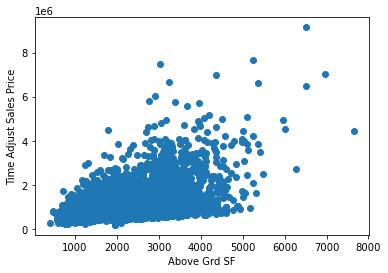

In [125]:
# Scatter plot
fig, ax = plt.subplots()
ax.scatter(X['Above Grd SF'], X['Time Adjust Sales Price'])

# x-axis label
ax.set_xlabel('Above Grd SF')

# y-axis label
ax.set_ylabel('Time Adjust Sales Price')
plt.show()

This doesn't look bad, however there could be issues modeling special houses together with general. 

#### 'Est Land SF' variable 
Now let's look at land SF

In [130]:
print(X['Est Land SF'].describe())

fig = px.histogram(X, x="Est Land SF", title ='Land area')
fig.show()



count     10707.000000
mean       8673.690296
std        7369.334840
min           0.000000
25%        6233.000000
50%        7440.000000
75%        9613.500000
max      490486.000000
Name: Est Land SF, dtype: float64


In [131]:
fig = px.scatter(X, y="Est Land SF", title ='Land area')
fig.show()

This doesn't look bad, there are only a few large properties and we already double checked the top point - 11 acre lot. 

Let's look at sales price by the market area. 

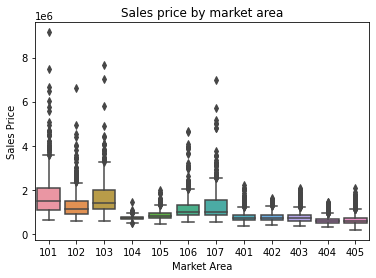

In [141]:
_ = sns.boxplot(x='Market Area', y='Time Adjust Sales Price', data=X)
_ = plt.xlabel('Market Area')
_ = plt.ylabel('Sales Price')
_= plt.title('Sales price by market area')
plt.show()

Boulder market areas(101-107) seem a bit more expensive on average compared to suburbs (401-405). Let's break up this graph into such areas.

In [147]:
boulder =X[X['Market Area']<400]
suburbs =X[X['Market Area']>=400]
print(boulder.shape)
print(suburbs.shape)

(3627, 45)
(7080, 45)


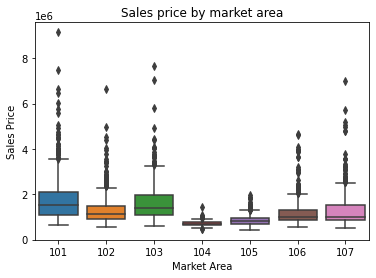

In [151]:
_ = sns.boxplot(x='Market Area', y='Time Adjust Sales Price', data=boulder)
_ = plt.xlabel('Market Area')
_ = plt.ylabel('Sales Price')
_= plt.title('Sales price by market area')
plt.show()

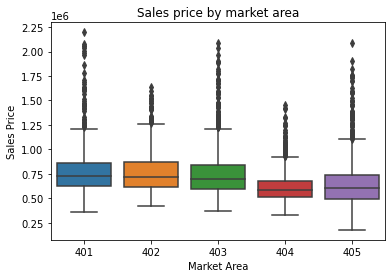

In [152]:
_ = sns.boxplot(x='Market Area', y='Time Adjust Sales Price', data=suburbs)
_ = plt.xlabel('Market Area')
_ = plt.ylabel('Sales Price')
_= plt.title('Sales price by market area')
plt.show()

In [139]:
import plotly.express as px
fig = px.box(X, x='Location', y='Time Adjust Sales Price')
fig.show()

Looking at sale price by the market area, all areas seem about the same median, perhaps slightly lower in Erie and Lafayette. It seems like the cheapest properties are available in Lafayette and there is less variability in Superior and Erie. 

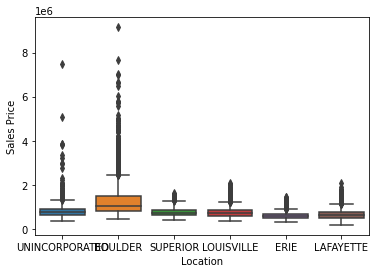

In [164]:
_ = sns.boxplot(x='Location', y='Time Adjust Sales Price', data=X)
_ = plt.xlabel('Location')
_ = plt.ylabel('Sales Price')
plt.show()

### Part 2. Pairwise correlations 

In [154]:
X[['Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']].head(4)

Sale Date (Mon-Yr)  Sale Price  Time Adjust Sales Price  Market Area  \
0         2017-11-03      517000            581143.136625          401   
1         2018-05-10      597000            652607.758723          401   
2         2019-06-21      531000            553206.861188          401   
3         2019-11-06      484000            495706.522160          401   

   Unincorporated  Design_1 Sty Townh  Design_Bi Level  Design_Modular  \
0               1                   0                0               0   
1               1                   0                0               0   
2               1                   0                0               0   
3               1                   0                0               0   

   Design_Multi Sty  Design_Paired  Design_Ranch  Design_Split level  \
0                 0              0             1                   0   
1                 0              0             1                   0   
2                 0              0             1                   0   
3                 0              0             0                   1   

   Quality_cat  Garage Attached  Market Area_401  Market Area_402  \
0            3                1                1                0   
1            3                1                1                0   
2            1                1                1                0   
3            3                1                1                0   

   Market Area_403  Market Area_404  Market Area_405  
0                0                0                0  
1                0                0                0  
2                0                0                0  
3                0                0                0

In [155]:
quantitative =['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']

In [156]:
quant =X[quantitative]

<AxesSubplot:>

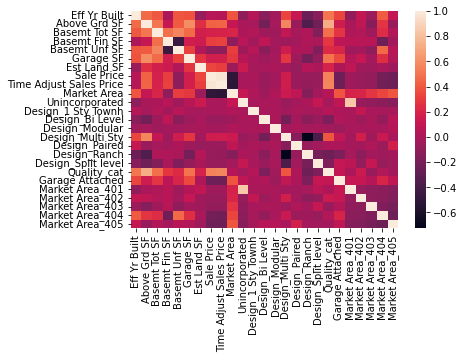

In [157]:
# calculate the correlation matrix
corr = quant.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

One thing is Unincorporated seems to be fully correlated with market area 401. Now I would like to see how the unincorporated properties are distributed between market areas. 

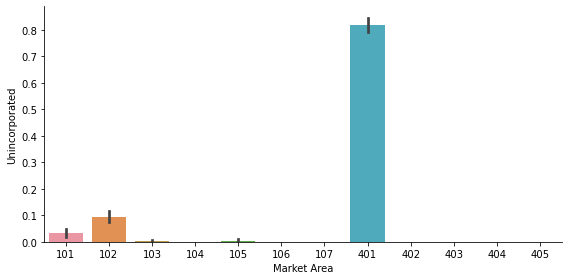

In [167]:
sns.catplot(
    data=X, x="Market Area", y="Unincorporated", 
    kind="bar", height=4, aspect=2,
)
plt.show()


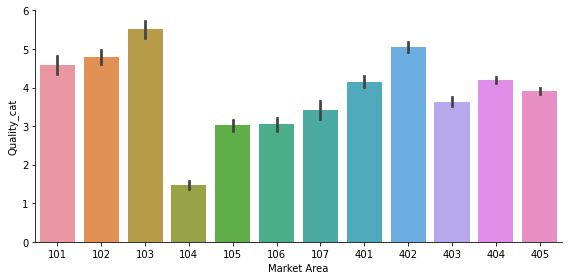

In [166]:
sns.catplot(
    data=X, x="Market Area", y="Quality_cat", 
    kind="bar", height=4, aspect=2,
)

It look like all the unincorporated properties are in Gunbarrel and none in other Market Areas.

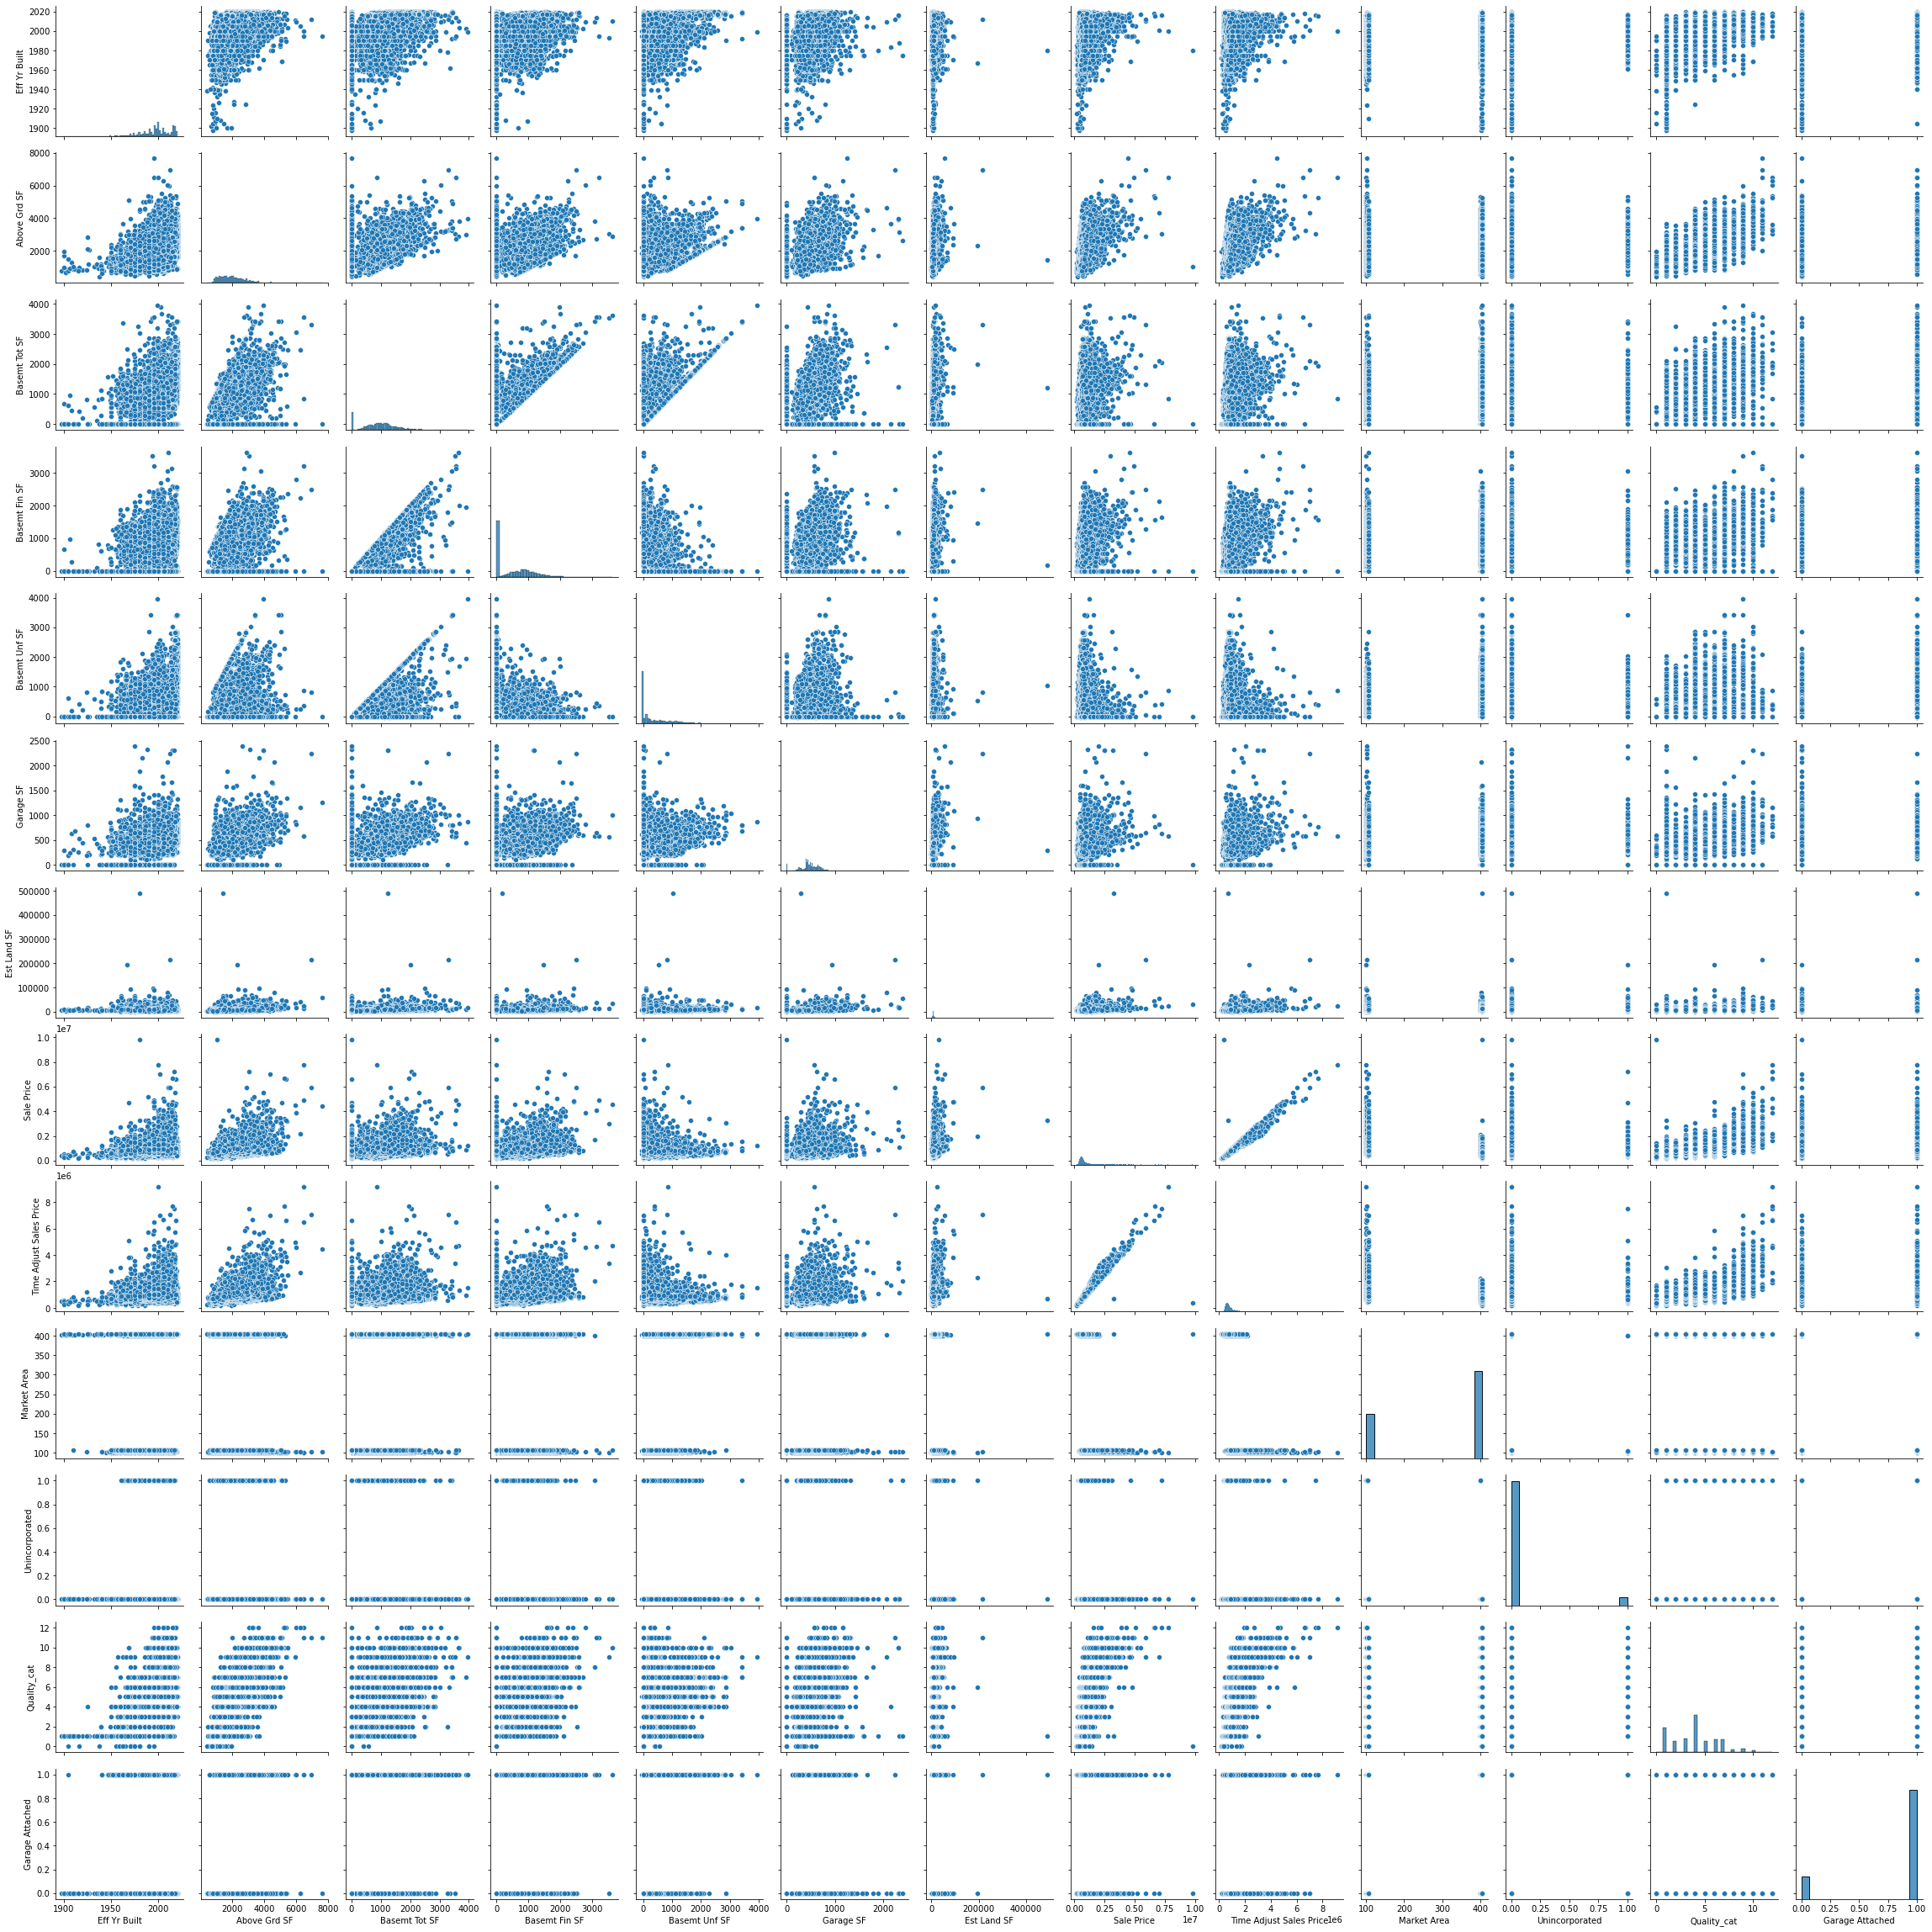

In [168]:
quant_no_dummies =X[['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Quality_cat', 'Garage Attached']]
sns.pairplot(quant_no_dummies)
plt.show()

<AxesSubplot:>

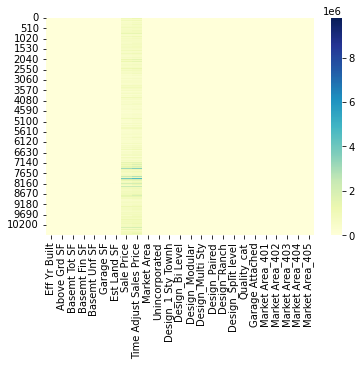

In [169]:
sns.heatmap(quant,cmap="YlGnBu")

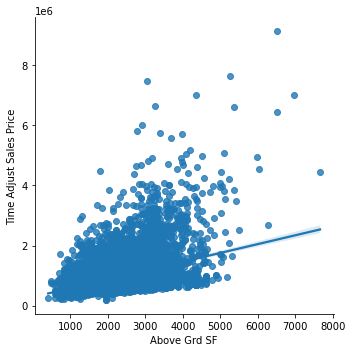

In [170]:
sns.lmplot(data=X, x="Above Grd SF", y="Time Adjust Sales Price")

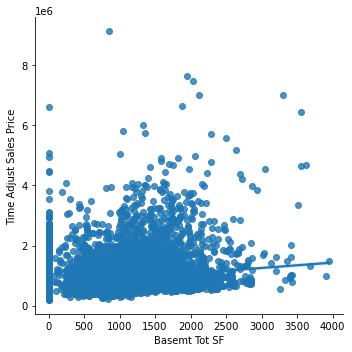

In [171]:
sns.lmplot(data=X, x="Basemt Tot SF", y="Time Adjust Sales Price")

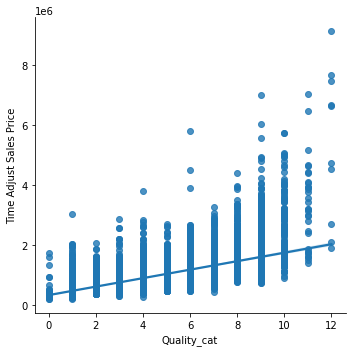

In [172]:
sns.lmplot(data=X, x="Quality_cat", y="Time Adjust Sales Price")

In [192]:
corr[corr>0.5]


Eff Yr Built  Above Grd SF  Basemt Tot SF  \
Eff Yr Built                 1.000000           NaN            NaN   
Above Grd SF                      NaN      1.000000       0.502274   
Basemt Tot SF                     NaN      0.502274       1.000000   
Basemt Fin SF                     NaN           NaN            NaN   
Basemt Unf SF                     NaN           NaN       0.560702   
Garage SF                         NaN      0.590862            NaN   
Est Land SF                       NaN           NaN            NaN   
Sale Price                        NaN           NaN            NaN   
Time Adjust Sales Price           NaN           NaN            NaN   
Market Area                       NaN           NaN            NaN   
Unincorporated                    NaN           NaN            NaN   
Design_1 Sty Townh                NaN           NaN            NaN   
Design_Bi Level                   NaN           NaN            NaN   
Design_Modular                    NaN           NaN            NaN   
Design_Multi Sty                  NaN      0.564641            NaN   
Design_Paired                     NaN           NaN            NaN   
Design_Ranch                      NaN           NaN            NaN   
Design_Split level                NaN           NaN            NaN   
Quality_cat                  0.507332      0.717716            NaN   
Garage Attached                   NaN           NaN            NaN   
Market Area_401                   NaN           NaN            NaN   
Market Area_402                   NaN           NaN            NaN   
Market Area_403                   NaN           NaN            NaN   
Market Area_404                   NaN           NaN            NaN   
Market Area_405                   NaN           NaN            NaN   

                         Basemt Fin SF  Basemt Unf SF  Garage SF  Est Land SF  \
Eff Yr Built                       NaN            NaN        NaN          NaN   
Above Grd SF                       NaN            NaN   0.590862          NaN   
Basemt Tot SF                      NaN       0.560702        NaN          NaN   
Basemt Fin SF                      1.0            NaN        NaN          NaN   
Basemt Unf SF                      NaN       1.000000        NaN          NaN   
Garage SF                          NaN            NaN   1.000000          NaN   
Est Land SF                        NaN            NaN        NaN          1.0   
Sale Price                         NaN            NaN        NaN          NaN   
Time Adjust Sales Price            NaN            NaN        NaN          NaN   
Market Area                        NaN            NaN        NaN          NaN   
Unincorporated                     NaN            NaN        NaN          NaN   
Design_1 Sty Townh                 NaN            NaN        NaN          NaN   
Design_Bi Level                    NaN            NaN        NaN          NaN   
Design_Modular                     NaN            NaN        NaN          NaN   
Design_Multi Sty                   NaN            NaN        NaN          NaN   
Design_Paired                      NaN            NaN        NaN          NaN   
Design_Ranch                       NaN            NaN        NaN          NaN   
Design_Split level                 NaN            NaN        NaN          NaN   
Quality_cat                        NaN            NaN        NaN          NaN   
Garage Attached                    NaN            NaN        NaN          NaN   
Market Area_401                    NaN            NaN        NaN          NaN   
Market Area_402                    NaN            NaN        NaN          NaN   
Market Area_403                    NaN            NaN        NaN          NaN   
Market Area_404                    NaN            NaN        NaN          NaN   
Market Area_405                    NaN            NaN        NaN          NaN   

                         Sale Price  Time Adjust Sales Price  Market Area  \
Eff Yr Built        

In [174]:
quantitative =['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 
       'Garage SF', 'Est Land SF',  
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405']

### Are there variables that are particularly significant in terms of explaining the answer to your project question?
The significant variables for our analysis are:  <br>
● the year the house was built <br>
● above ground square footage<br>
● Basement square footage<br>
● basement finished square footage<br>
● Garage square footage<br>
● garage type<br>
● land square footage<br>
● house design<br>
● market area <br>

● Are there significant differences between subgroups in your data that may be relevant to your project aim?

Most Market Area subgroups seem to be pretty uniform, with Gunbarrel having unincorporated properties. 

● Are there strong correlations between pairs of independent variables or between an independent and a dependent variable?

There are strong correlations between time adjusted sale price and sale price, so keep time adjusted sale price only. Market area 401 and unincorporated is 0.83687. Most unincorporated properties are located in Gunbarrel and some in Boulder. 

 Quality and above grd sf 0.717716
There are no other correlations greater than 0.8.<br>


There is a significant correlation between basement total SF and Above Grd SF 0.502274. Bigger houses tend to have bigger basements.  <br>
There is a significant correlation between Garage SF and above Grd sF 0.590862. Bigger houses tend to have bigger garages. <br>
There is a significant correlation between basement unf and basement tot 0.560702. So we have some duplicated info between Basement total, Basement finished and Basement unfinished. Since Basement unfinished and Basement total are uncorrelated, we will drop the basement unfinished variable for our modeling stage. 
There is a significant correlation between quality and year built 0.507332. Older houses deteriorate more, lowering the quality.  <br>
There is a significant correlation between quality and above grd sF 0.717716. Bigger houses tend to be of better quality. If you rich, you're rich. Ok. <br>
There is a significant correlation between Quality and time adjusted sale price 0.566788, also makes sense. <br>

When we only had suburbs, we had the following correlations: 
There is a significant correlation between quality and sale price of 0.74.
There is significant correlation of 0.66 between Garage SF and Above Grd SF. 
There is significant correlation of 0.6 between Basement total and Basement unfinished. 
Correlation 0.59 between the above ground SF and sale price.
Correlation of 0.5 between garage SF and basement total SF.
Multi story design correlated with above grd SF at 0.53
Quality is correlated with Basement and Garage SF at 0.53 and 0.54. 
All of the above mentioned correlations are significant.

Looking at categorical variables, we can do chi square test by looking at quality and design or quality and market area. Testing Market Area and Quality, design and quality and Market area and Design, all pairs are not independent. 

Let's test the hypothesis that Market Area and Quality are independent. We will calculate a contingency table and perform a chi squared test. 

In [175]:
pd.crosstab(X['Market Area'], X['Quality'])

Quality      Avg  Avg +  Avg ++  Excel  Excel+  Excel++  Fair  Good  Good +  \
Market Area                                                                   
101           81     41      77     24       3        4     0    86      47   
102          101     52      27     10       3        3     0   118      44   
103           76     26      70     40       9        1     0    83      20   
104          210     54      22      0       0        0     0     6       5   
105          194     39      42      0       0        0     0   204      30   
106          184     80      98      3       3        0     0    77      27   
107          158     51      69      6       5        0     2    57      16   
401           85     65      93      9       1        0     0   219      70   
402           16     44     136      8       0        0     0   165     103   
403          254    243     171      2       0        0     4   216     119   
404          223     39     180      9       0        0     0   845     198   
405          436    167     140     22       7        2    14   941     223   

Quality      Good ++  V Good  V Good +  V Good++  
Market Area                                       
101               69      36        21        28  
102              115      93        34        27  
103               98     101        33        65  
104                1       0         0         0  
105               27      20         1         2  
106               34      24        10         8  
107               25      23        19        22  
401               73      66        13        12  
402              119     184        18        24  
403              166     120        10        16  
404              108     190        20        35  
405              191     192        30        24

In [176]:
from scipy.stats import chi2_contingency
  
# defining the table
data = pd.crosstab(X['Market Area'], X['Quality'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


Now let's test the relationship between design and quality

In [177]:
# defining the table
data = pd.crosstab(X['Design'], X['Quality'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


Now let's test the relationship between design and Market Area

In [178]:
# defining the table
data = pd.crosstab(X['Market Area'], X['Design'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 0.0
Dependent (reject H0)


For quantitative variables we'll use pearson's r

In [179]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
pearsonr(X['Quality_cat'], X['Time Adjust Sales Price'])


(0.5667877831692407, 0.0)

And since the corresponding p-value is less than .05, we conclude that there is a statistically significant association between the two variables.

In [180]:
pearsonr(X['Garage SF'], X['Above Grd SF'])

(0.5908615449213822, 0.0)

In [181]:
pearsonr(X['Basemt Tot SF'],X['Basemt Unf SF'])

(0.5607021940663462, 0.0)

In [182]:
pearsonr(X['Basemt Tot SF'], X['Garage SF'])

(0.46257073387159486, 0.0)

In [183]:
pearsonr(X['Basemt Tot SF'], X['Quality_cat'])

(0.4772728726635537, 0.0)

In [184]:
pearsonr(X['Quality_cat'], X['Garage SF'])

(0.4902383976093935, 0.0)

So now it's time to save our X and Y variables ready for analysis. We keep the time adjusted sales price and drop the unfinished basement variable. 

In [185]:
X.columns

Index(['Accout Number', 'Property Type', 'Property Address Street Number',
       'Property Address Street Dir', 'Property Address Street Name',
       'Property Address Street Suffix', 'Property Address Unit Number',
       'Location', 'Design', 'Quality', 'Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF', 'Basemt Unf SF', 'Garage Type',
       'Garage SF', 'Est Land SF', 'Reception No', 'Sale Date (Mon-Yr)',
       'Sale Price', 'Time Adjust Sales Price', 'Market Area',
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_101', 'Market Area_102', 'Market Area_103',
       'Market Area_104', 'Market Area_105', 'Market Area_106',
       'Market Area_107', 'Market Area_401', 'Market Area_402',
       'Market Area_403', 'Market Area_404', 'Market Area_405'],
      dtype='object')

In [186]:
data_for_modeling = X[['Eff Yr Built', 'Above Grd SF',
       'Basemt Tot SF', 'Basemt Fin SF',
       'Garage SF', 'Est Land SF',  
       'Unincorporated', 'Design_1 Sty Townh', 'Design_Bi Level',
       'Design_Modular', 'Design_Multi Sty', 'Design_Paired', 'Design_Ranch',
       'Design_Split level', 'Quality_cat', 'Garage Attached',
       'Market Area_401', 'Market Area_402', 'Market Area_403',
       'Market Area_404', 'Market Area_405','Time Adjust Sales Price']]

In [187]:
data_for_modeling.to_csv('data/data_for_modeling.csv', index=False)